<a href="https://colab.research.google.com/github/KeonhoChu/Mini_Projects/blob/main/Analysis_of_Pima_Indian_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

df =pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.shape #(768,9)


(768, 9)

# EDA

In [ ]:
df.info()
#non_null은 결측지 없음을 의미합니다, 모두 숫자로 이루어진 데이터.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()
# 글루코스, 혈압, 피부주름두께,인슐린, bmi는 0이 될수없음 -> 결측치일 가능성이 높음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
feature_columns = df.columns[0:-1].tolist()
feature_columns
#데이터 시각화를 위해 coulumn을 저장해줌 마지막 outcome은 label값이므로 제외함

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
cols= feature_columns[1:]
cols
# 결측치가 글루코스부터 존재하므로 슬라이싱을 통해 글루코스부터 가져옴


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()
# 결측치 여부를 나타내는 데이터 프레임을 만들어주고
# 0 이라는 값을 결측치라고 가정하고 cols에 저장한 칼럼에 대해 결측치 여부를 구해
# df_null이라는 데이터 프레임에 저장

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
df_null.mean()

Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

In [ ]:
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

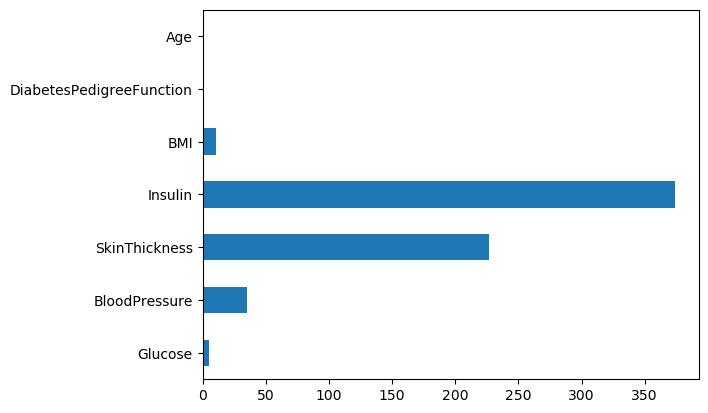

In [ ]:
df_null.sum().plot.barh()
# 결측치 시각화

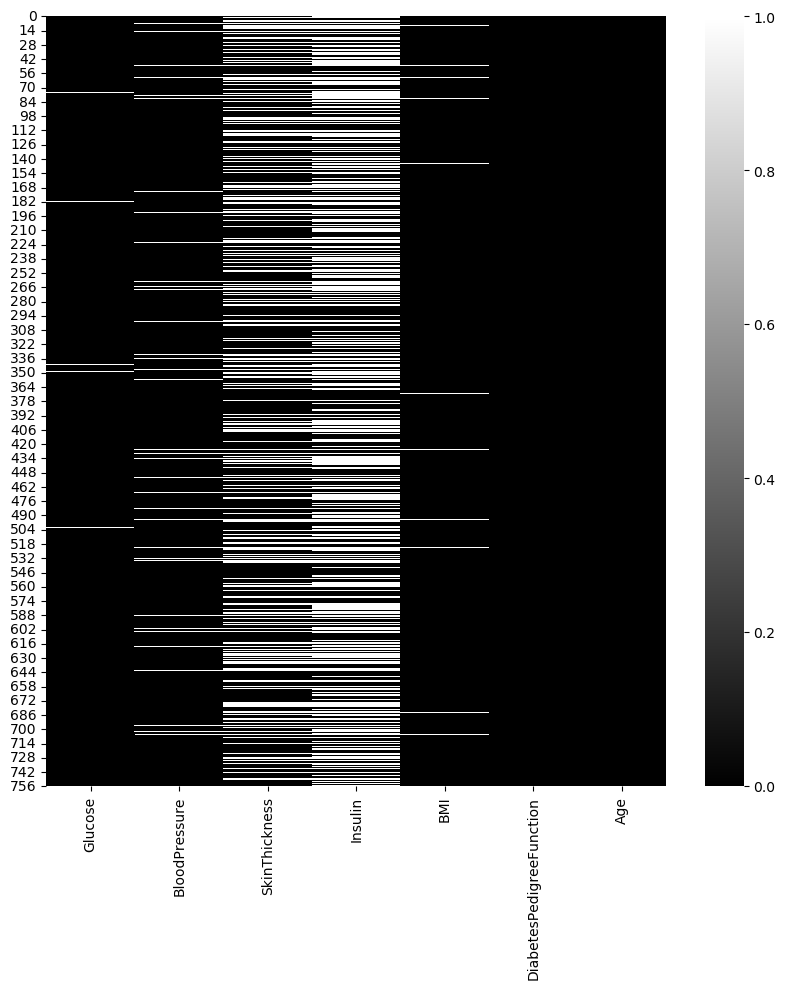

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_null,cmap='gray')
# 히트맵으로 결측치 확인 -> 흰색이 많을수록 결측치가 많음->피부두께와 인슐린에 결측치가 많음

# 시각화

In [ ]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df['Outcome'].value_counts() # outcome의 갯수

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df['Outcome'].value_counts(normalize=True) # outcome의 비율
# 당뇨가 생길확률 35프로
# 당뇨가 생기지 않을 확률 65프로로

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po
# 데이터셋에서 임신횟수로 그룹화 해주고 결과값에 대한 비율과 수를 저장함
# agg() - 여러함수를 한번에 적용하게 해줌
# reset_index() 인덱스 리셋


# 임신횟수가 14회 이상된다면 발병 확률이 100프로가 되는걸 확인가능능

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


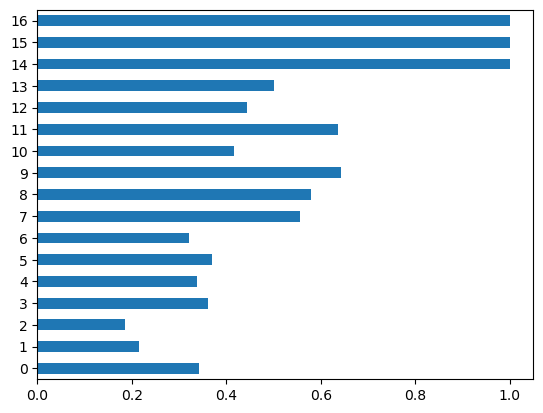

In [ ]:
df_po['mean'].plot.barh()
# 임신 횟수에 따른 발병 확률을 시각화화

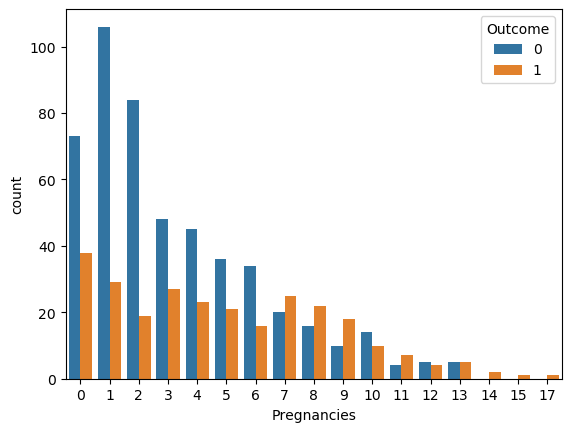

In [ ]:
sns.countplot(data=df,x ='Pregnancies',hue='Outcome')
#countplot을 사용하여 빈도수를 시각화

In [ ]:
df['Pregnancies_high']=df['Pregnancies']>6
#임신횟수가 6이 상 이라면 true

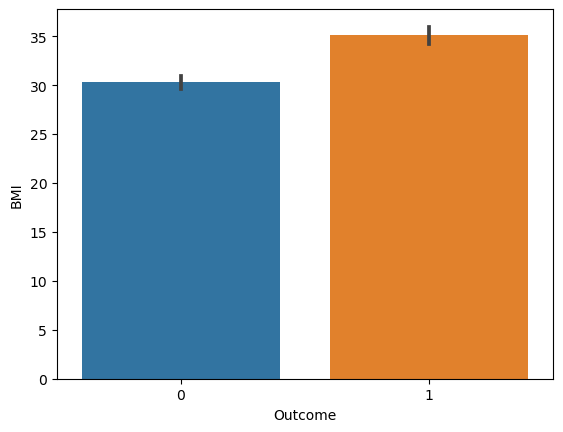

In [ ]:
sns.barplot(data=df, x='Outcome',y='BMI')

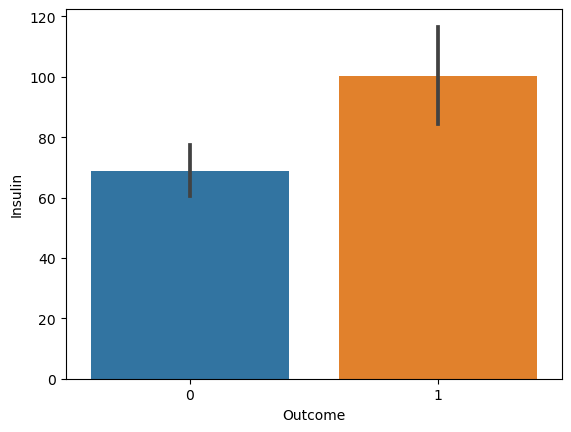

In [ ]:
sns.barplot(data=df, x='Outcome',y='Insulin')

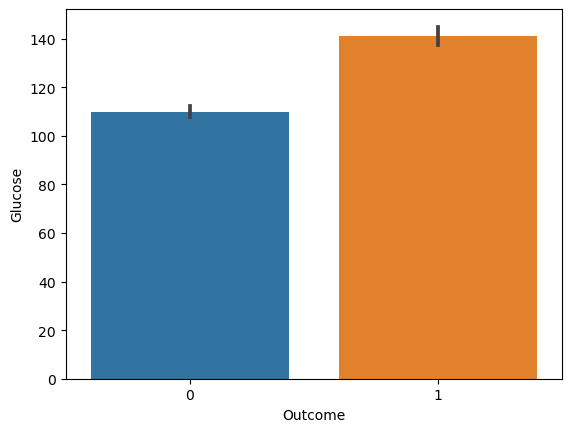

In [ ]:
sns.barplot(data=df, x='Outcome',y='Glucose')

<ipython-input-22-696b2d684c67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no['Pregnancies'])
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/u

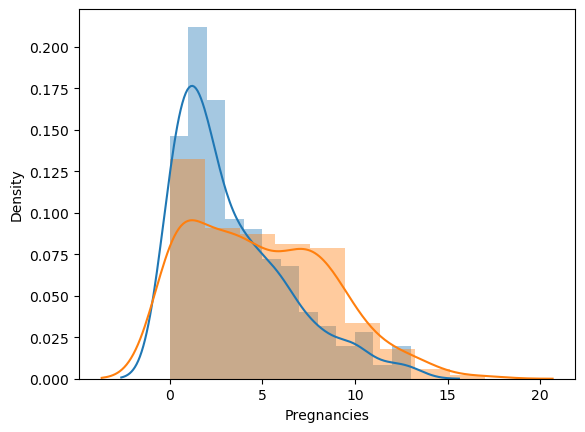

In [ ]:
df_no = df[df['Outcome']== 0]
df_yes = df[df['Outcome']== 1]
sns.distplot(df_no['Pregnancies'])
sns.distplot(df_yes['Pregnancies'])
# 임신 여부에따른 발병률 시각화


<ipython-input-23-b5c8c3883e0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no['Age'])
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local

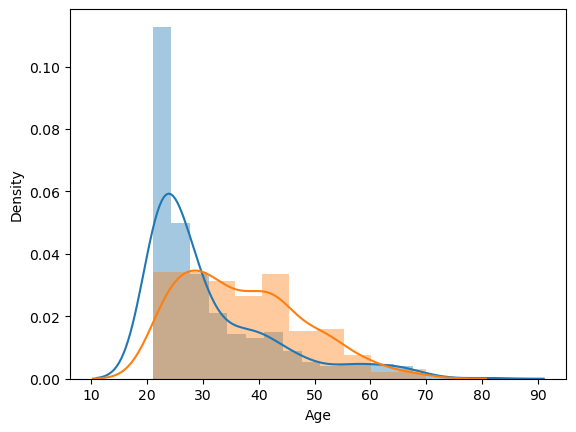

In [ ]:
sns.distplot(df_no['Age'])
sns.distplot(df_yes['Age'])

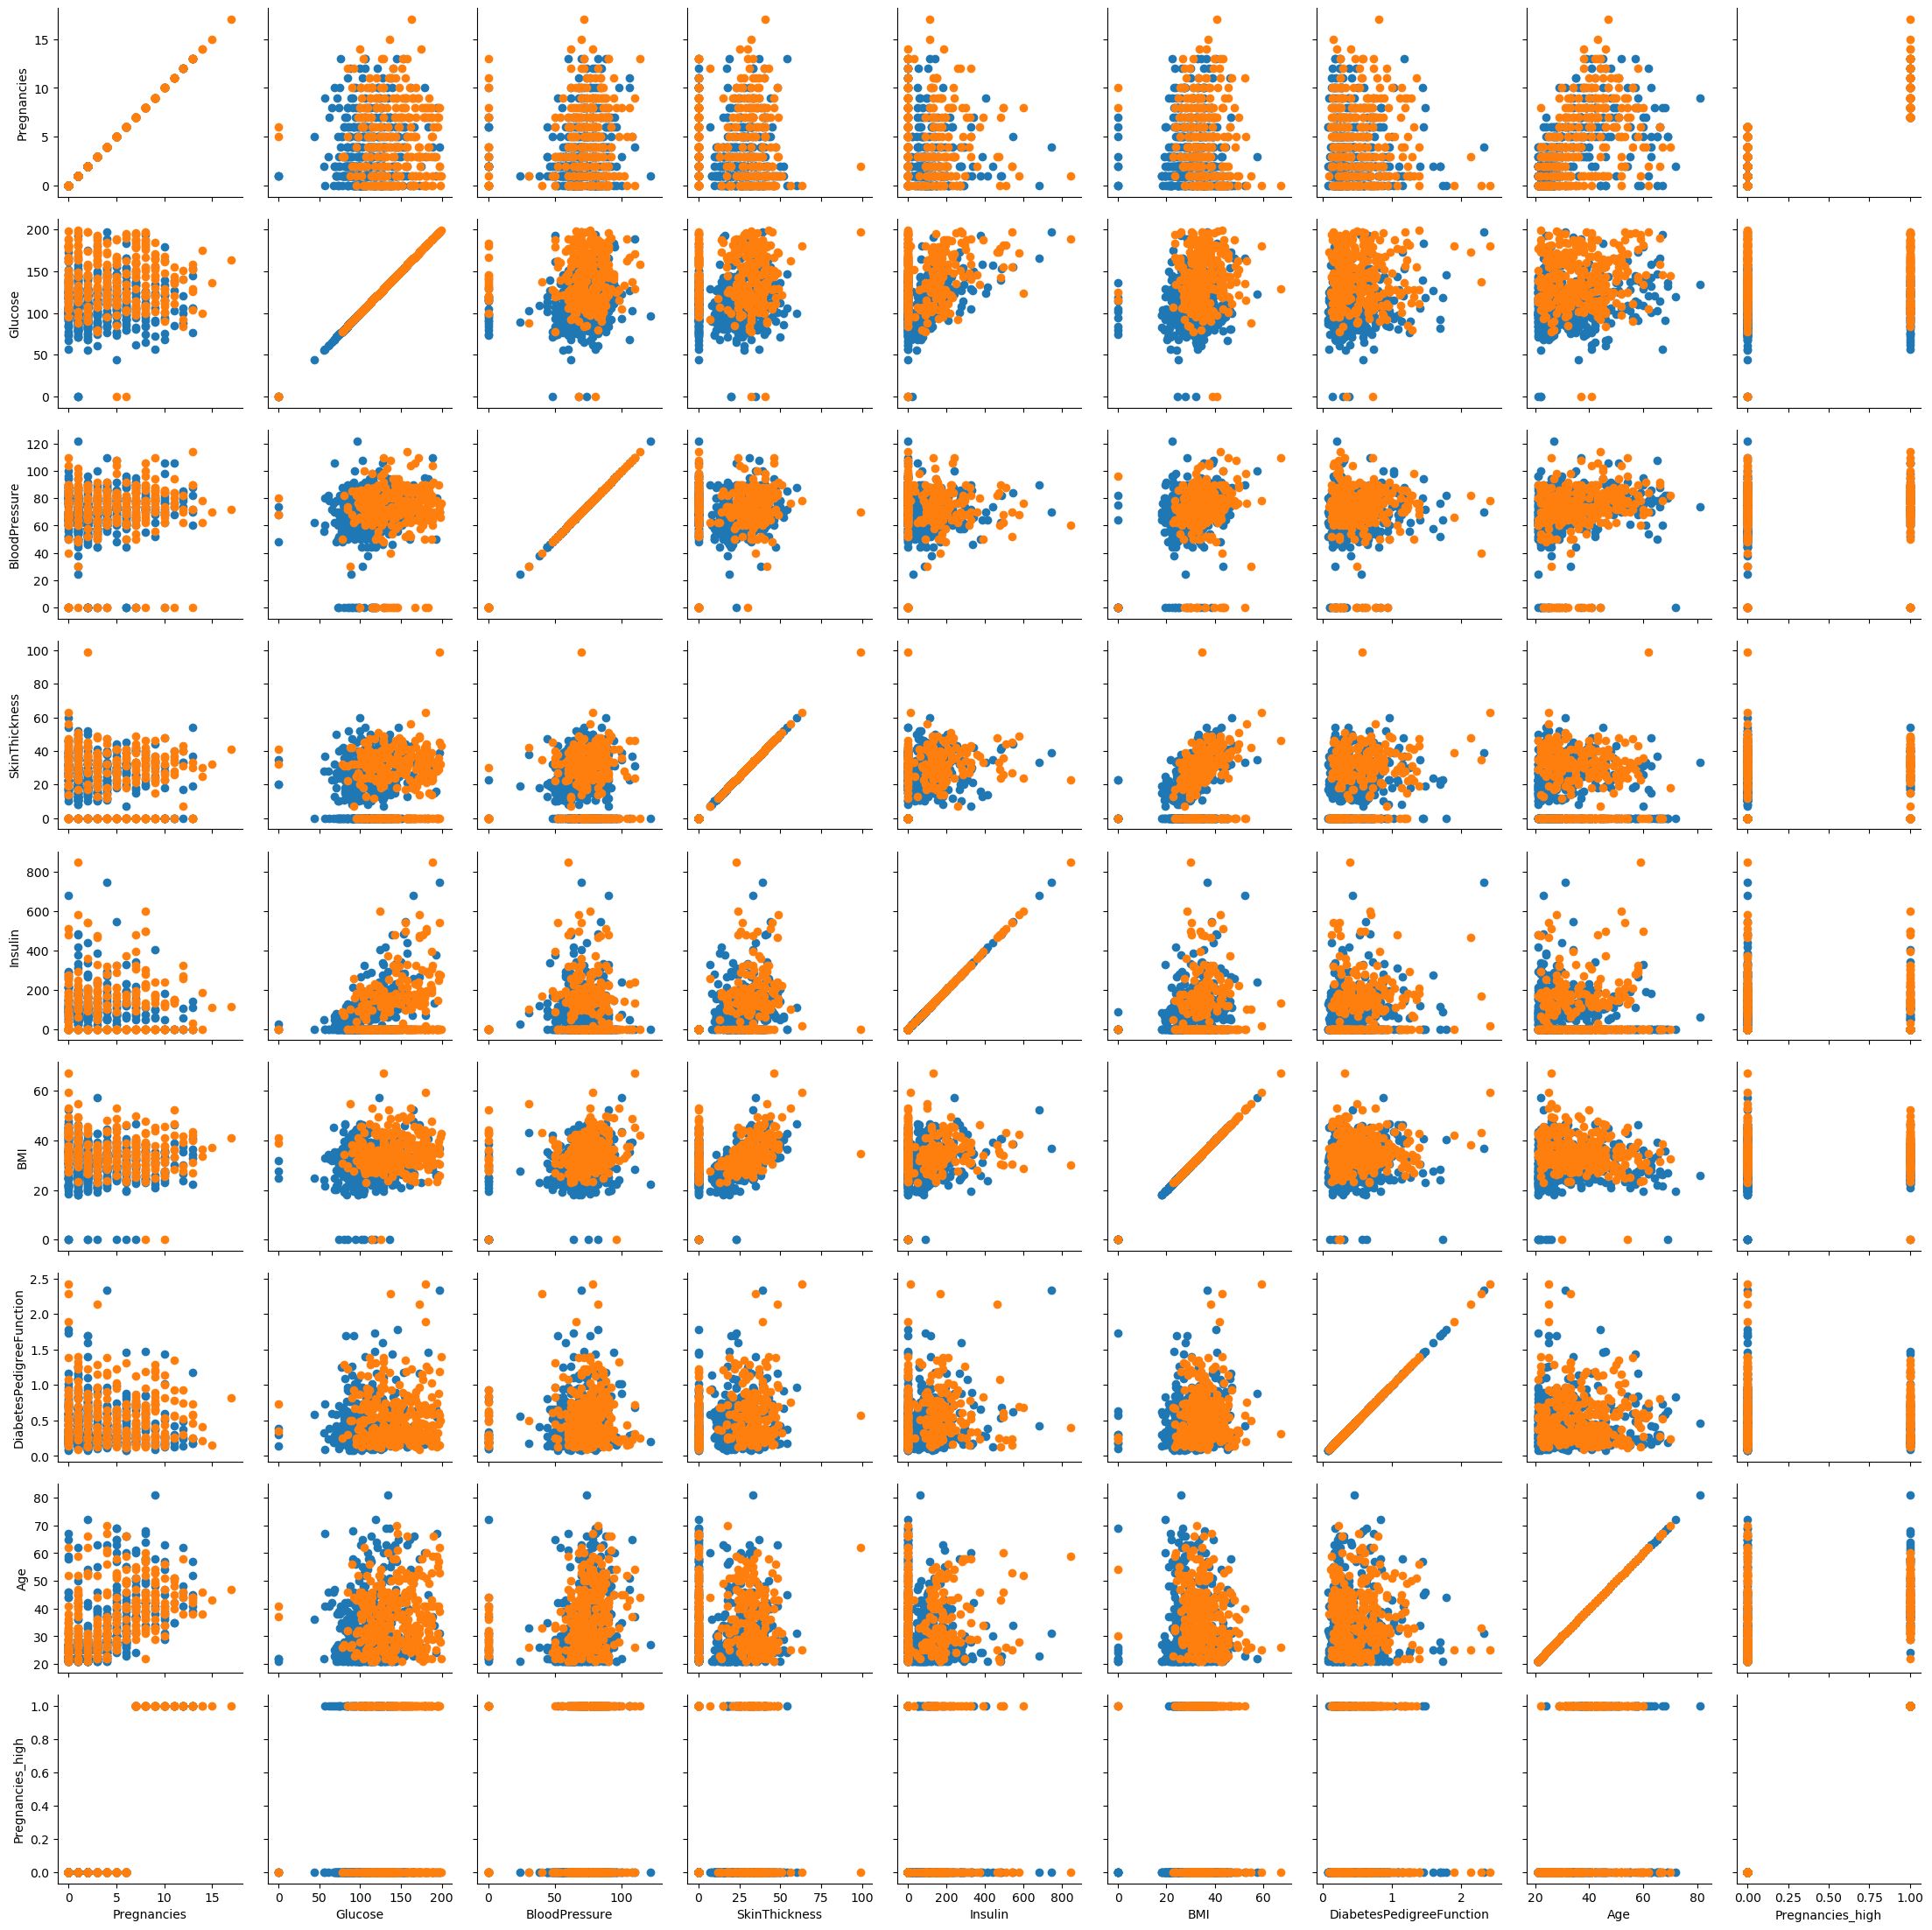

In [ ]:
pg = sns.PairGrid(df,hue='Outcome')
pg.map(plt.scatter)

# 데이터 전처리


In [ ]:
split_count = int(df.shape[0]*0.8)
#데이터를 8:2로 스플릿
train = df[:split_count].copy()
test = df[split_count:].copy()

feature_names = train.columns.tolist()
feature_names.remove('Outcome')# out컬럼을 제거해줌
#트레인칼럼을 리스트형태로 가져옴(여러개의 칼럼을 가져오기때문에 리스트 형태로 가져오고 )
# labelname은 한개이기때문에 그냥 가져옴
label_name = 'Outcome'

#학습세트
x_train=train[feature_names]
y_train=train[label_name]
x_test = test[feature_names]
y_test = test[label_name]



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

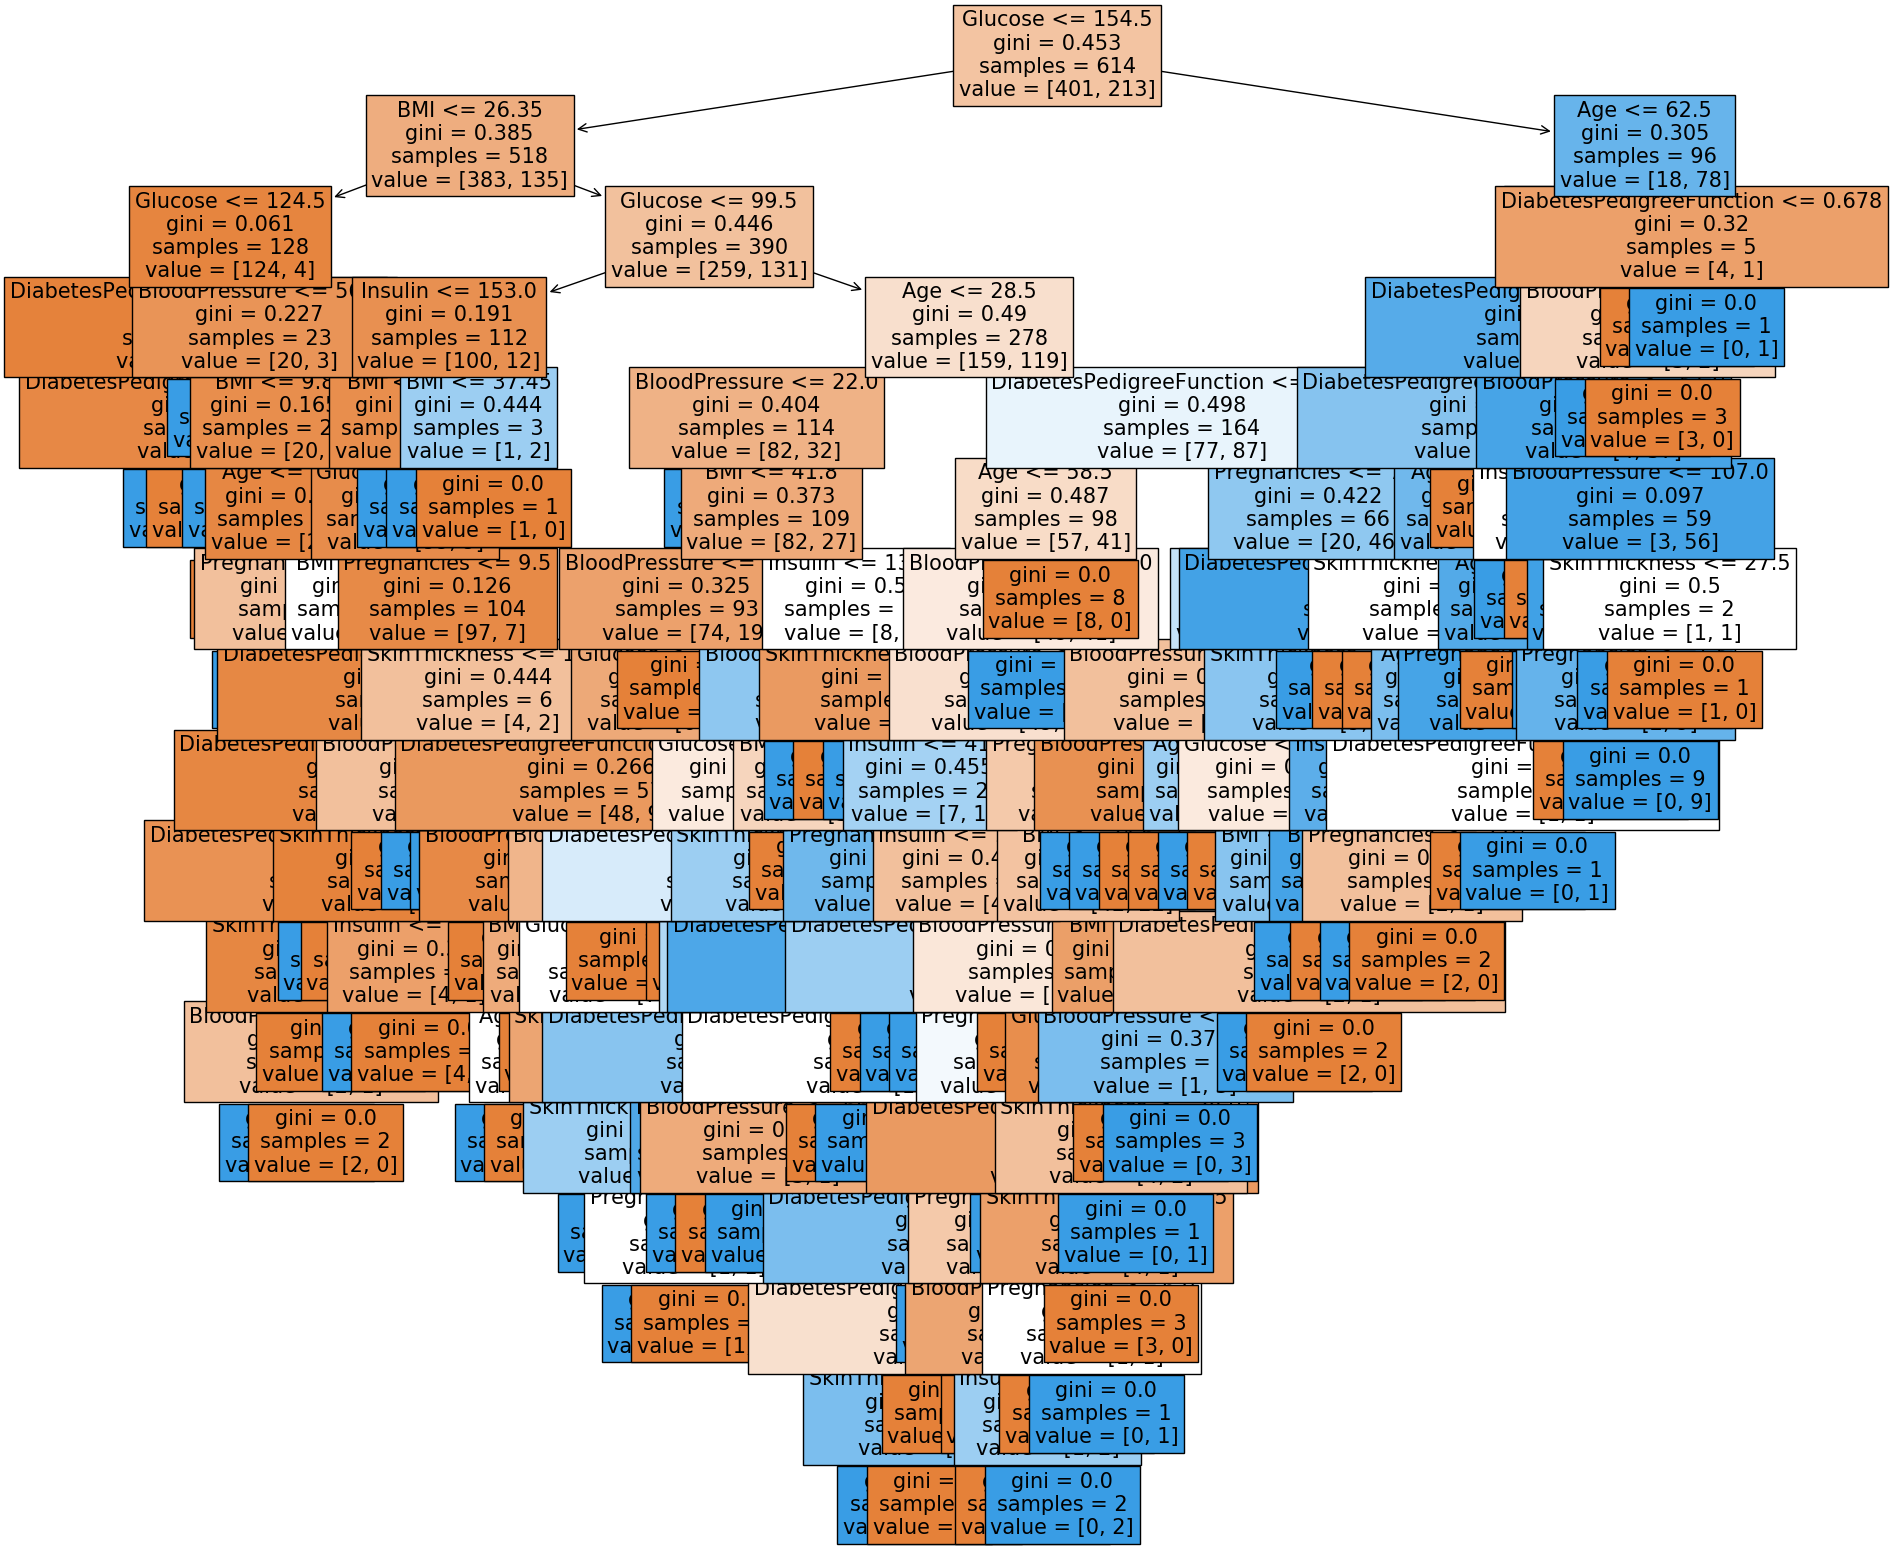

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model,feature_names =
                 feature_names,
                 filled= True,
                 fontsize = 15)



In [ ]:
df['Insulin_nan']= df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']].head()
# 인슐린이 0인 값을 nan으로 채우기

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df['Insulin_nan'].isnull().sum() #인슐린 데이터의 결측치 값

374

In [ ]:
df['Insulin_nan'].isnull().mean() #인슐린 데이터의 결측치 비율

0.4869791666666667

In [ ]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean'])
#결측치 처리전 평균값을 outcome 값으로 확인

<ipython-input-31-3ca82f9f8ac5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean'])


,Insulin,Insulin_nan
,mean,mean
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [ ]:
df.loc[(df['Outcome']==0)&(df['Insulin_nan'].isnull()),'Insulin_nan'] = 68.7
df.loc[(df['Outcome']==1)&(df['Insulin_nan'].isnull()),'Insulin_nan'] = 100.3

<ipython-input-33-bf1bc1245cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/loca

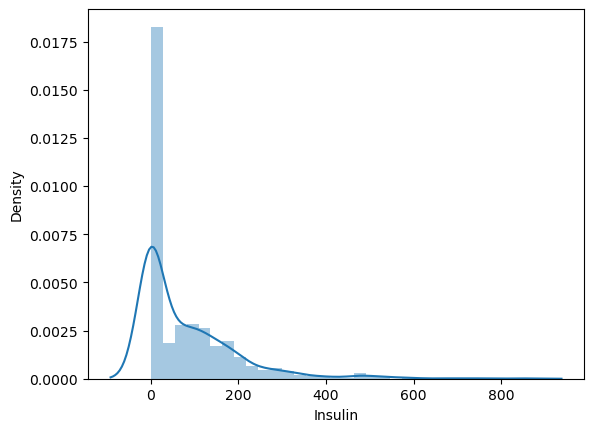

In [ ]:
sns.distplot(df['Insulin'])

<ipython-input-34-694c5f1dd93a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Insulin']>0,'Insulin'])
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, n

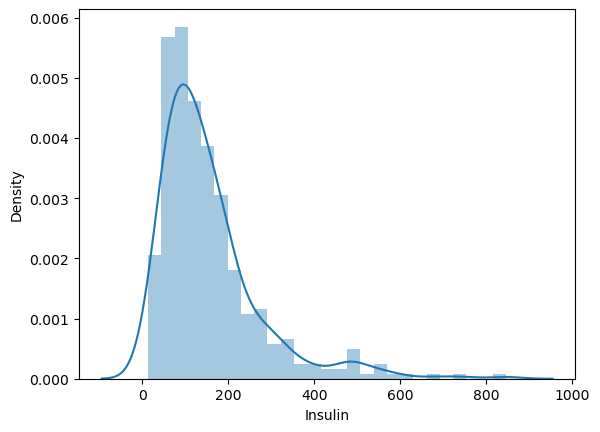

In [ ]:
sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

<ipython-input-35-b40e97308d86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/

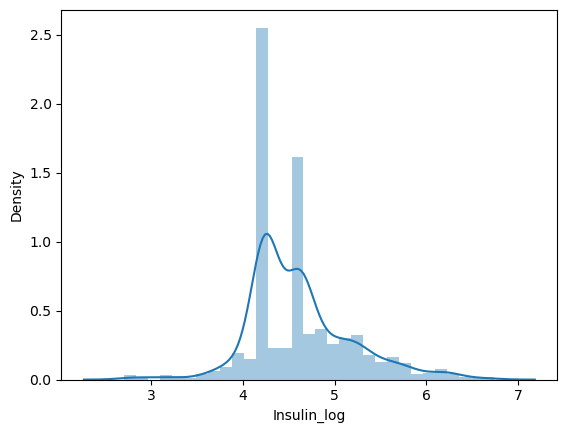

In [ ]:
df['Insulin_log']=np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

<ipython-input-36-7741b8e7fe9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  

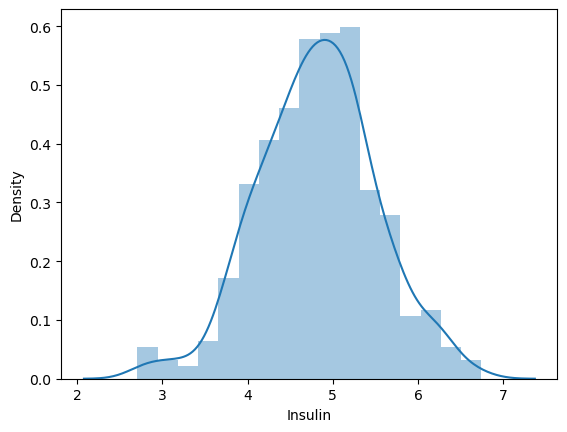

In [ ]:
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))
# 외도 첨도를 줄이고 정규분포로 만들어주기 위해 log를 취해줌
#로그를 취하면 0 이하의 음수 값은 음의 무한으로 가기 때문에 1을 더해줌


In [ ]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_log
0,6,148,72,35,0,33.6,0.627,50,1,False,100.3,4.618086
1,1,85,66,29,0,26.6,0.351,31,0,False,68.7,4.244200
2,8,183,64,0,0,23.3,0.672,32,1,True,100.3,4.618086
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,4.553877
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,5.129899
5,5,116,74,0,0,25.6,0.201,30,0,False,68.7,4.244200
6,3,78,50,32,88,31.0,0.248,26,1,False,88.0,4.488636
7,10,115,0,0,0,35.3,0.134,29,0,True,68.7,4.244200
8,2,197,70,45,543,30.5,0.158,53,1,False,543.0,6.298949
9,8,125,96,0,0,0.0,0.232,54,1,True,100.3,4.618086


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Insulin_nan', 'Insulin_log'],
      dtype='object')

In [ ]:
x = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_log',
       'Pregnancies_high']]

In [ ]:
y=df['Outcome']

In [ ]:
from scipy.sparse import random
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_log,Pregnancies_high
60,84,0,0,0.0,0.304,21,4.244200,False
618,112,82,24,28.2,1.282,50,4.618086,True
346,139,46,19,28.7,0.654,22,4.430817,False
294,161,50,0,21.9,0.254,65,4.244200,False
231,134,80,37,46.2,0.238,46,5.916202,False
...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,4.948760,False
106,96,122,0,22.4,0.207,27,4.244200,False
270,101,86,37,45.6,1.136,38,4.618086,True
435,141,0,0,42.4,0.205,29,4.618086,False


# Tree


In [ ]:
model = DecisionTreeClassifier(random_state=42,max_depth=4)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy_score(y_test,y_pred)*100

88.31168831168831

In [ ]:
precision_score(y_test,y_pred)*100

82.45614035087719

In [ ]:
recall_score(y_test,y_pred)*100

85.45454545454545

In [ ]:
roc_auc_score(y_test,y_pred)

0.8767676767676768

In [ ]:
f1_score(y_test,y_pred)*100

83.92857142857144

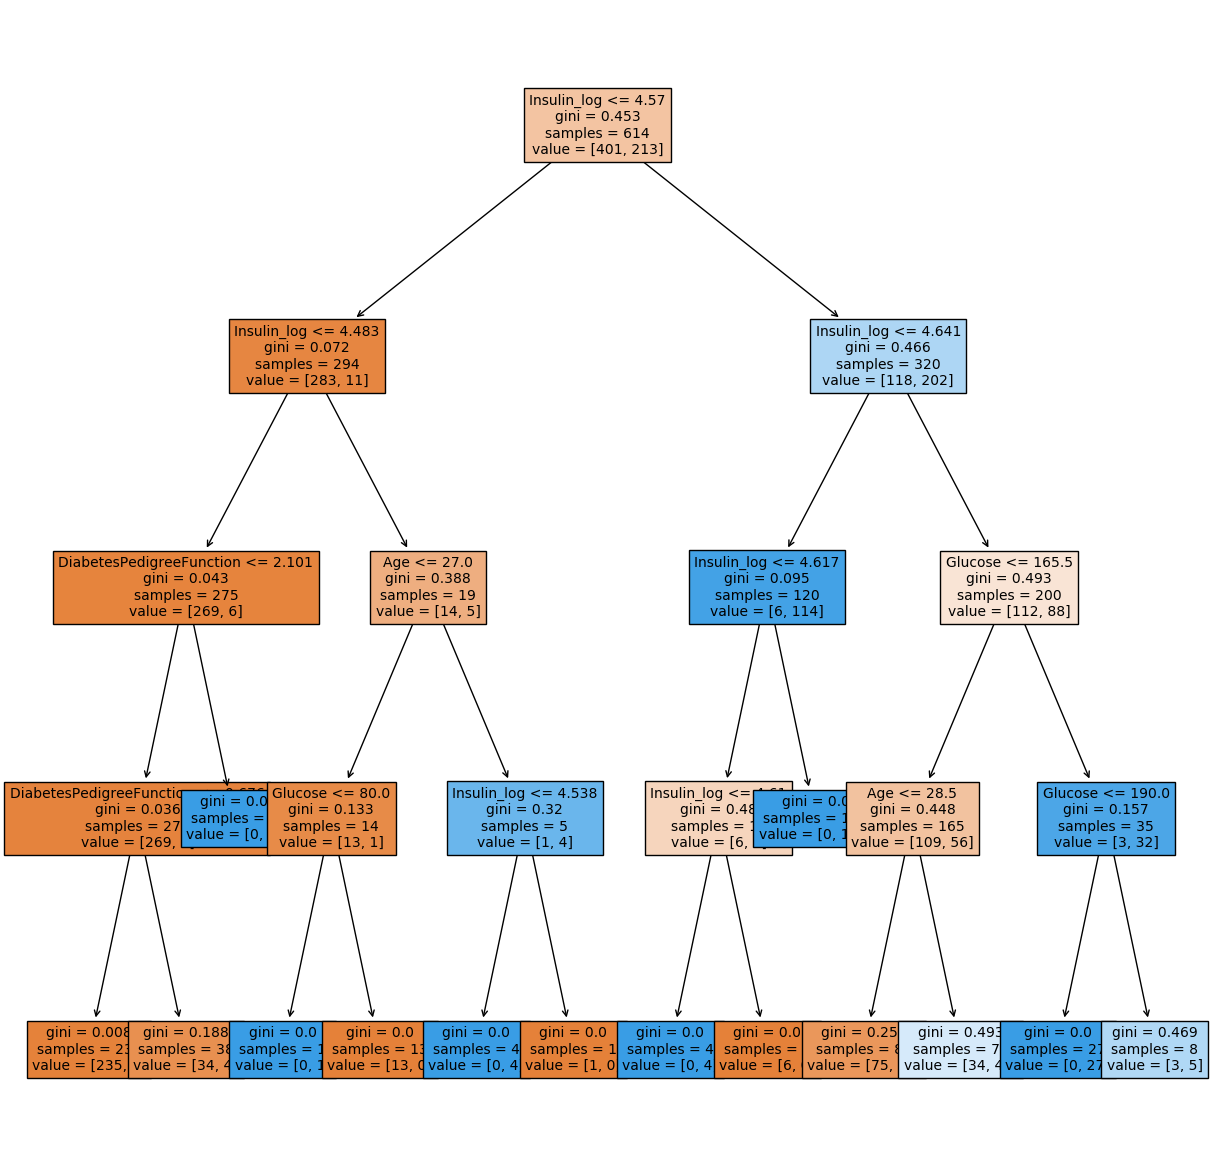

In [ ]:

feature_names = x_train.columns.tolist()
plt.figure(figsize = (15,15))

tree = plot_tree(model,feature_names =
                 feature_names,
                 filled= True,
                 fontsize = 10)


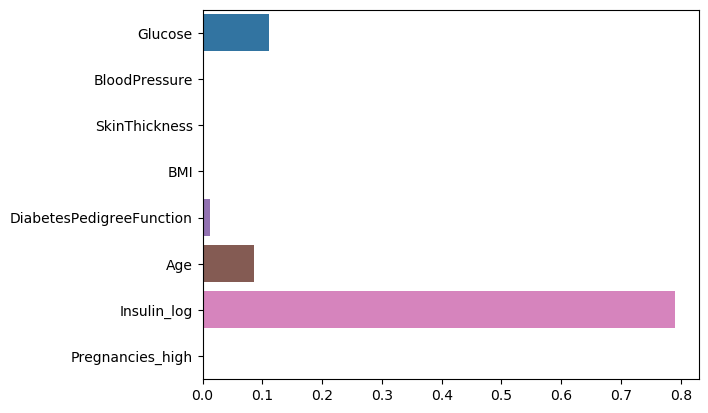

In [ ]:
model.feature_importances_
feature_names=x_train.columns.tolist()
sns.barplot(x=model.feature_importances_,y=feature_names)

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=42)

model2.fit(x_train,y_train)
y_pred2 = model.predict(x_test)

accuracy_score(y_test,y_pred2)*100


88.31168831168831

In [ ]:
precision_score(y_test,y_pred2)*100

82.45614035087719

In [ ]:
recall_score(y_test,y_pred2)*100

85.45454545454545

In [ ]:
roc_auc_score(y_test,y_pred2)

0.8767676767676768

In [ ]:
f1_score(y_test,y_pred2)*100

83.92857142857144

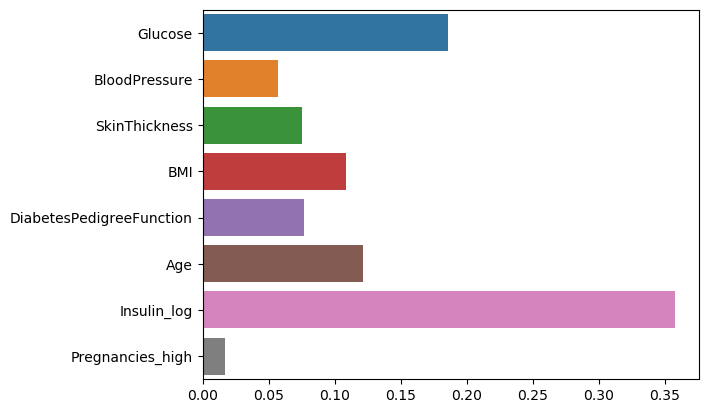

In [ ]:
model2.feature_importances_
feature_names=x_train.columns.tolist()
sns.barplot(x=model2.feature_importances_,y=feature_names)

In [ ]:
!pip install pdpbox
!pip install wheel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


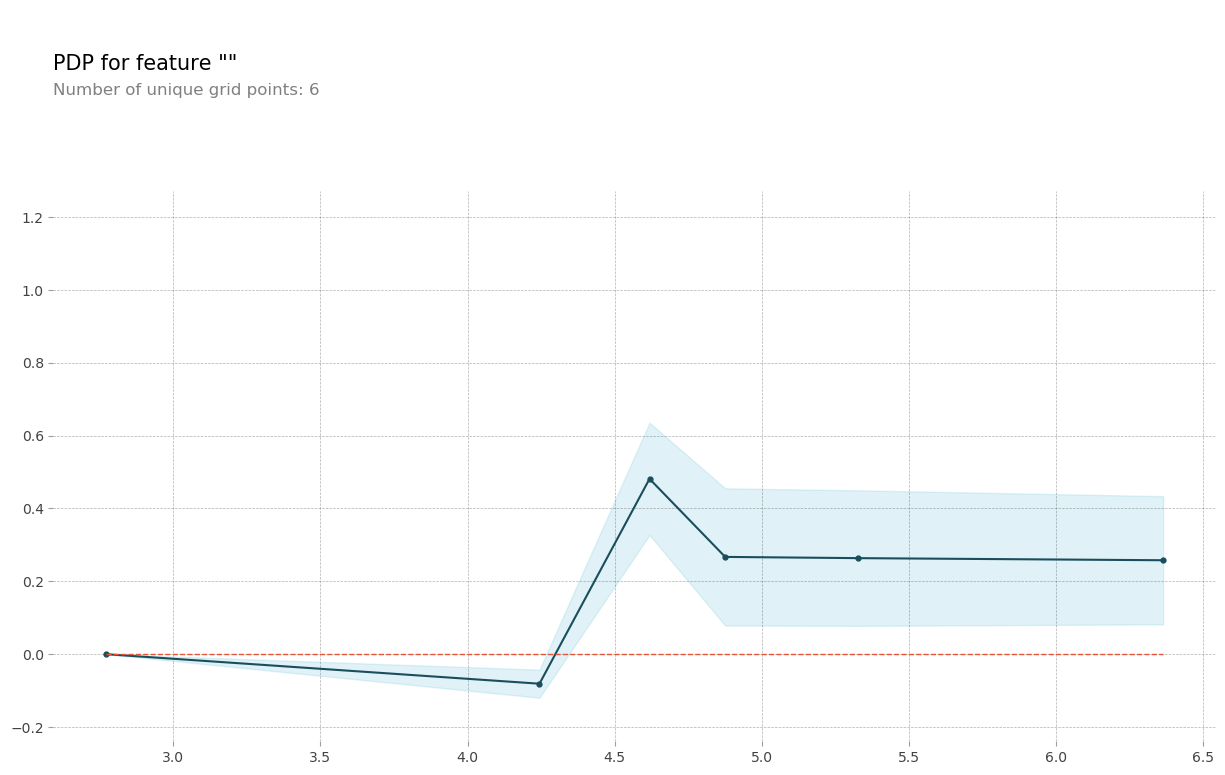

In [ ]:

import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model2, dataset=x_test, model_features=feature_names, feature='Insulin_log')

# plot it
pdp.pdp_plot(pdp_goals, '')
plt.show()

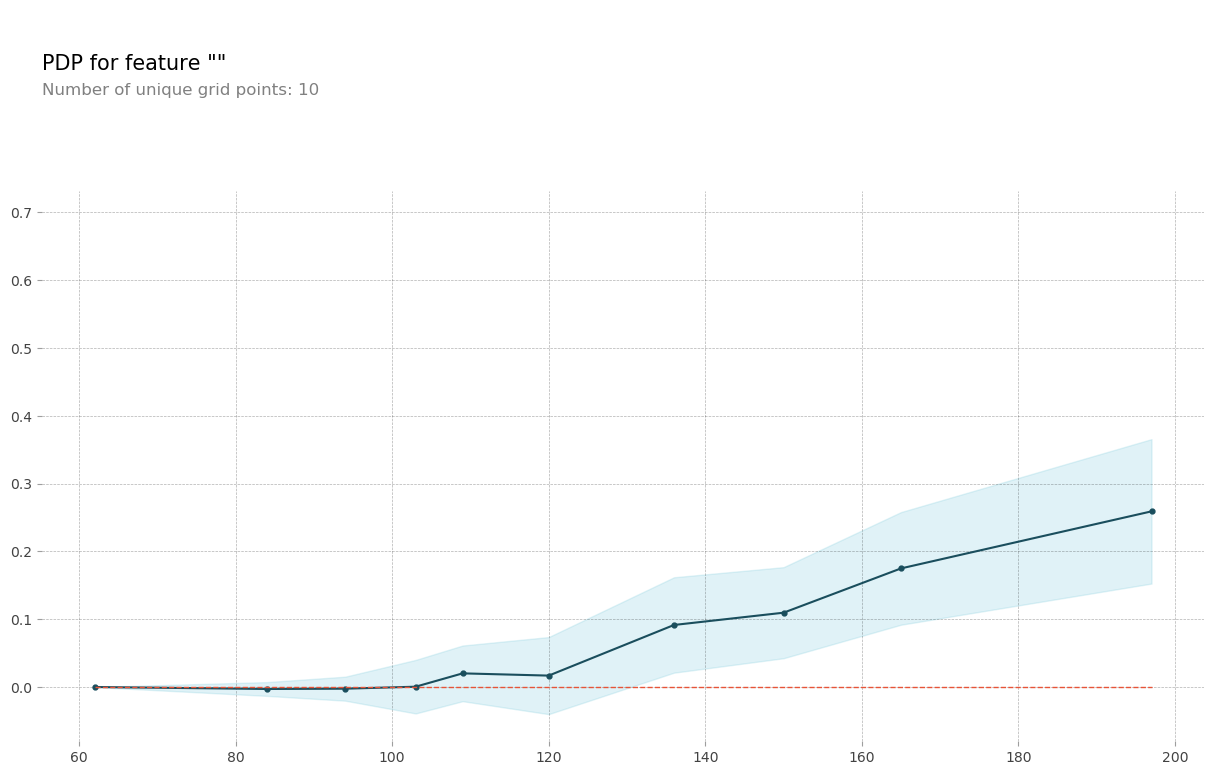

In [ ]:
pdp_goals = pdp.pdp_isolate(model=model2, dataset=x_test, model_features=feature_names, feature='Glucose')

# plot it
pdp.pdp_plot(pdp_goals, '')
plt.show()

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

AUROC:  0.8767676767676768
Accuracy:  0.8831168831168831
Precision:  0.8245614035087719
Recall:  0.8545454545454545


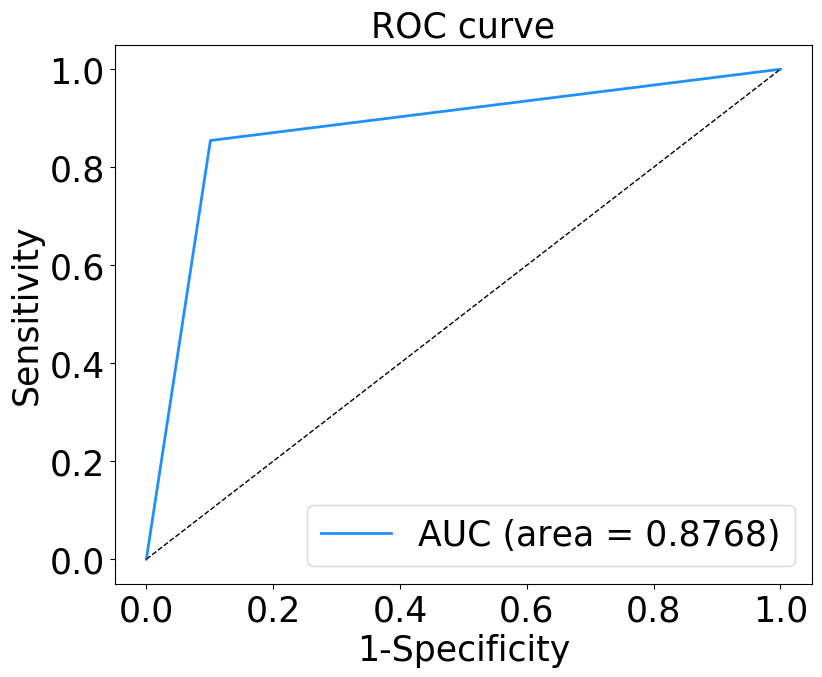

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, th = roc_curve(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUROC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' %roc_auc)
plt.plot([0,1],[0,1], color='black', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25) # [FPR]
plt.ylabel('Sensitivity', fontsize=25) # [TPR]
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()